# El Problema de los 2 Cuerpos

In [160]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline

# Ecuaciones diferenciales para el sistema de N-cuerpos
def eom(y,t,masas):
    M=len(y);N=M/6
    r=zeros((N,3));v=zeros((N,3))
    drdt=zeros((N,3));dvdt=zeros((N,3))    
    for i in xrange(N):
        r[i]=y[3*i:3*i+3];
        v[i]=y[3*N+3*i:3*N+3*i+3]

        
    # Derivadas
    for i in xrange(N):
        drdt[i]=v[i]
        for j in xrange(N):
            if i==j:continue
            dvdt[i]+=-masas[j]/norm(r[i]-r[j])**3*(r[i]-r[j])

    # Devuelve derivadasç
    dydt=array([])
    for i in xrange(N):dydt=concatenate((dydt,drdt[i]))
    for i in xrange(N):dydt=concatenate((dydt,dvdt[i]))
    return dydt

# Un Sistema Jerarquico de 3 Cuerpos

In [218]:
# Define el sistema de partículas
sistema=[
    # Particula 0
    dict(
        m=10.0,
        r=[1,0,0],
        v=[0,1,1]
    ),
    # Particula 1
    dict(
        m=1.0,
        r=[1.5,0,0],
        v=[0,-3,1]
    ),
    # Particula 2
    dict(
        m=0.1,
        r=[-1,0,0],
        v=[0,2.5,1]
    ),
]

# Prepara el Sistema de Partículas
Ntot=len(sistema)
masas=[]
rs=[];vs=[];ys=[]
for i in xrange(Ntot):
    particula=sistema[i]
    if particula['m']>0:
        masas+=[particula['m']]
        rs+=particula['r'];vs+=particula['v']
ys=rs+vs
M=len(ys)
N=M/6
Masa=sum(masas)

# Soluciona el Problema
Nt=1000
ts=linspace(0,2,Nt)

solucion=odeint(eom,ys,ts,args=(masas,))

rs=zeros((N,Nt,3))
vs=zeros((N,Nt,3))
for i in xrange(N):
    n=3*i
    rs[i]=solucion[:,n:n+3]
    m=3*N+3*i
    vs[i]=solucion[:,m:m+3]
    
# Posición del Centro de Masa
R = zeros((Nt,3))
for it in xrange(Nt):
    for n in xrange(N):
        R[it]+=masas[n]*rs[n,it]/Masa

# Velocidad del Centro de Masa
V=zeros((Nt,3))
for it in xrange(Nt):
    for n in xrange(N):
        V[it]+=masas[n]*vs[n,it]/Masa

# Refiere la posición de las partículas al centro de masa
for n in xrange(N):
    rs[n,:]=rs[n,:]-R
    vs[n,:]=vs[n,:]-V

# El problema analizado como 2 sistemas de 2 cuerpos

In [219]:
# Partícula 0 y Partícula 1
it=10

# Propiedades del sistema relativo
mu01=masas[0]+masas[1]
Masa01=masas[0]+masas[1]
rcm01=(masas[0]*rs[0,it]+masas[1]*rs[1,it])/Masa01
vcm01=(masas[0]*vs[0,it]+masas[1]*vs[1,it])/Masa01

r=rs[0,it]-rs[1,it]
v=vs[0,it]-vs[1,it]

# Constantes de movimiento
h=cross(r,v)
eps=0.5*norm(v)**2-mu01/norm(r)
evec=cross(h,v)/mu01+r/norm(r)

# Propiedades derivadas
e=norm(evec)
p=norm(h)**2/mu01
a=p/(1-e**2)

print "Excentricidad de la órbita:",e
print "Semilatus rectum:",p
print "Semieje mayor:",a

# Calculo de las posiciones del sistema relativo
fs=linspace(-pi,pi,100)
ra=[]
for f in fs:
    re=p/(1+e*cos(f))
    x=re*cos(f)
    y=re*sin(f)
    ra+=[[x,y,0]]
ra=array(ra)
    
r0=rcm01+masas[1]/Masa01*ra
r1=rcm01-masas[0]/Masa01*ra

Excentricidad de la órbita: 0.272731051381
Semilatus rectum: 0.363633161778
Semieje mayor: 0.392854558484


In [220]:
# Partícula 0+1 y Partícula 2

# Propiedades del sistema relativo
mu012=Masa01+masas[2]
rcm012=(Masa01*rcm01+masas[2]*rs[2,it])/Masa
r=rcm01-rs[2,it]
v=vcm01-vs[2,it]

# Constantes de movimiento
h=cross(r,v)
eps=0.5*norm(v)**2-mu012/norm(r)
evec=cross(h,v)/mu012+r/norm(r)

# Propiedades derivadas
e=norm(evec)
p=norm(h)**2/mu012
a=p/(1-e**2)

print "Excentricidad de la órbita:",e
print "Semilatus rectum:",p
print "Semieje mayor:",a

# Calculo de las posiciones del sistema relativo
fs=linspace(-pi,pi,100)
ra=[]
for f in fs:
    re=p/(1+e*cos(f))
    x=re*cos(f)
    y=re*sin(f)
    ra+=[[x,y,0]]
ra=array(ra)
    
r2=rcm012+Masa01/Masa*ra

Excentricidad de la órbita: 0.359961269551
Semilatus rectum: 1.30917419234
Semieje mayor: 1.50405819456


# Gráfica de todo el Sistema

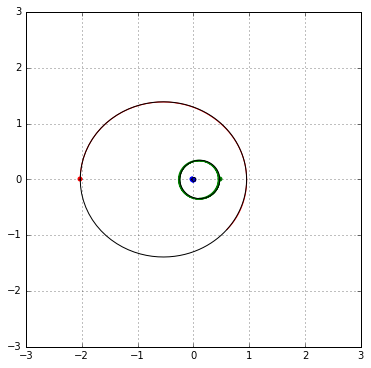

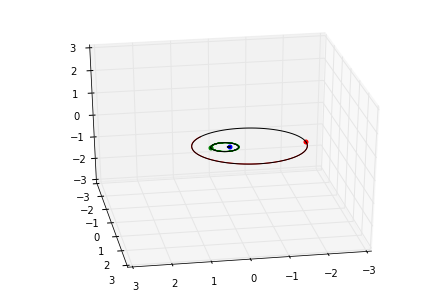

In [221]:
# Graficar en 3D
fig2d = plt.figure(figsize=(6,6))
fig3d = plt.figure()

ax3d=Axes3D(fig3d)
ax2d=fig2d.gca()

# Gráfica la solución numérica
for i in xrange(N):
    r=rs[i,:]
    
    # Grafica en 3D
    line,=ax3d.plot(r[:,0],r[:,1],r[:,2])
    color=line.get_color()
    ax3d.plot(r[0:1,0],r[0:1,1],r[0:1,2],'o',color=color,markersize=5,markeredgecolor='none')
    
    # Grafica en 2D
    ax2d.plot(r[:,0],r[:,1],color=color)
    ax2d.plot(r[0,0],r[0,1],'o',color=color,markersize=5,markeredgecolor='none')
    
    
# Gráfica la solución analítica
ax2d.plot(r0[:,0],r0[:,1],'k')
ax2d.plot(r1[:,0],r1[:,1],'k')
ax2d.plot(r2[:,0],r2[:,1],'k')
ax3d.plot(r0[:,0],r0[:,1],r0[:,2],'k')
ax3d.plot(r1[:,0],r1[:,1],r1[:,2],'k')
ax3d.plot(r2[:,0],r2[:,1],r2[:,2],'k')

ax3d.view_init(elev=30,azim=80)

ext=3
ax3d.set_xlim(-ext,ext)
ax3d.set_ylim(-ext,ext)
ax3d.set_zlim(-ext,ext)
ax2d.set_xlim(-ext,ext)
ax2d.set_ylim(-ext,ext)

ax2d.grid()